<a href="https://colab.research.google.com/github/SatyamRaj1/Pytorch_for_DL/blob/main/Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn # nn are the basic pytorch building blocks for graphs(computation graph)/neural networks
import matplotlib.pyplot as plt

# Data Preparation and Loading
* convert data into numerical representation

### Linear Regression

In [2]:
#"known parameters"
weight = 0.7
bias = 0.3

#create data
start = 1
end = 3
step = 0.039
X = torch.arange(start, end, step).unsqueeze(dim = 1)
Y = weight*X + bias
X[:10], Y[:10], len(X), len(Y)

(tensor([[1.0000],
         [1.0390],
         [1.0780],
         [1.1170],
         [1.1560],
         [1.1950],
         [1.2340],
         [1.2730],
         [1.3120],
         [1.3510]]),
 tensor([[1.0000],
         [1.0273],
         [1.0546],
         [1.0819],
         [1.1092],
         [1.1365],
         [1.1638],
         [1.1911],
         [1.2184],
         [1.2457]]),
 52,
 52)

### Splitting Data into Test, Train and Validation
* Train - course material (model learn Patterns) (60-80%)
* Val - practice exams (Tune model patterns) (not always required) (10-20%)
* Test - final Exam (See if the model is ready for real world) (10-20%)

Note: Use Scikit learn test train split as it provide randomness too

In [3]:
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(41, 41, 11, 11)

### Visualising Data


In [4]:
def plot_predictions(train_data = X_train, train_labels = Y_train, test_data = X_test, test_labels = Y_test, predictions = None):

  #plot train, test data and compare predictions
  plt.figure(figsize = (10, 7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', s = 4, label = "Training Data") # c = color, s = size

  #Plot testing data in Red
  plt.scatter(test_data, test_labels, c = 'r', s = 4, label = "Testing Data")

  #are there prediction then plot in green color
  if predictions is not None:
    plt.scatter(test_data, predictions, c = 'g', s = 4, label = "Predictions") #so we can compare test and pred data

  plt.legend(prop = {"size" : 14}) #legend will show labels on matplotlib (which color responds to which label)  #prop - properties

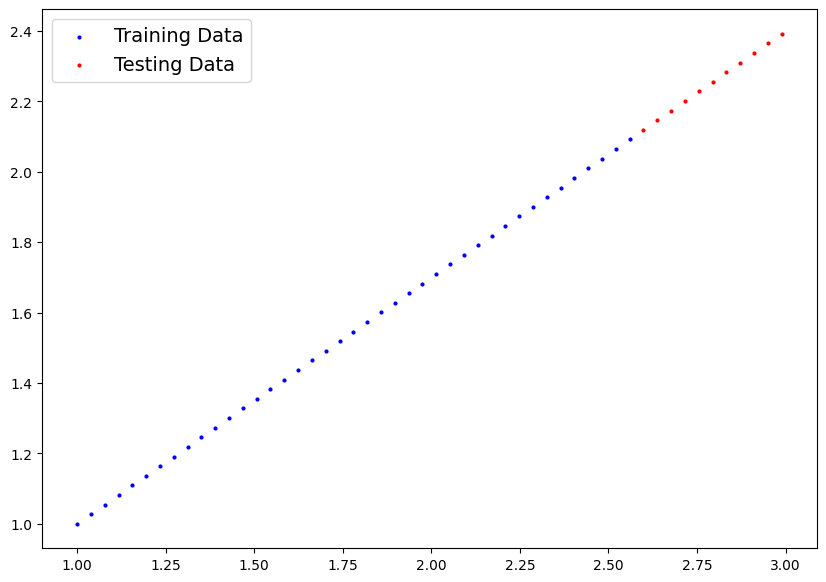

In [5]:
plot_predictions()

# Build Model

* nn.module
  * Base class for all neural network modules.
  * Your models should also subclass this class.
  * building bricks of pytorch model
  * Modules can also contain other Modules, allowing to nest them in a tree structure.
  * we can stack these modules on top of each other and make complex modules


In [6]:
# create linear regression class
class LinearRegression(nn.Module): #nn.Module is inherited in Linear Regression class
  def __init__(self):
    super().__init__() #constructor of base class

    # Initialise model parameters to be used in various computations
    # (these could be different layers from torch. nn, single parameters, hard-coded values or functions)

    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad = True, #if the parameter requires gradient. Pytorch will keep track of gradient of these parameters so that it can update them
                                           dtype = torch.float)) #Bydefault - require_grad = True, dtype = torch.float
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad = True,
                                        dtype = torch.float))

  # Forward method to define the computation in the model
  # Any subclass of nn.Module needs to override forward () (this defines the forward computation of the montel)
  def forward(self, x: torch.Tensor) -> torch.Tensor: # input torch.Tensor ->x and return torch.Tensor
    return self.weights*x + self.bias
  #if forward is not aligned with init then unimplimented error

# Pytorch Modules
* torch.nn -> contains all of the buildings for computationl grephs (a neural network can be considered a computational graph)
* torch.nn.Parameter -> what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module -> The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim -> contains optimize algorithms, used in gradient descent. optimize parameters
* def forward() -> all nn.Module subclasses require to override forward(), defines how forward computation will occur
* torchvision -> pytorch computer vision

1. Load/Prepare Data -> torchvision.transforms, torch.utils.data.Dataset, torch.utils.data.DataLoader
2. Build a Model -> torch.nn, torch.nn.Module, torchvision.models, torch.optim(optimizer),
4. Evaluate Model -> torchmetrics
5. Improve through experimentaiton -> torch.utils.tensorboard

  

### Display Parameters


In [7]:
#set seed as we are using random values in our model (for parameters)
torch.manual_seed(42)

# Create an instance/object of class
Model0 = LinearRegression()
# checking parameter of model
# print(Model0)
# print(Model0.parameters())
list(Model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
Model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Predictions
* using torch. inference_mode ()
* To check our model's predictive power, let's see how well it predicts y_test based on x_test.
* When we pass data through our model, it's going to run it through the forward() method.

In [9]:
X_test

tensor([[2.5990],
        [2.6380],
        [2.6770],
        [2.7160],
        [2.7550],
        [2.7940],
        [2.8330],
        [2.8720],
        [2.9110],
        [2.9500],
        [2.9890]])

#inference mode
* turns off gradient tracking
* as we are not doing training but predicting
* so python will take care of less data so fast predictions

https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=cnKav09iTgwQ-rfri6u7PQ

* Equal to `with torch.no_grad():`
* inference_mode() is preferred

In [10]:
with torch.inference_mode():
  y_pred = Model0(X_test) #similiar to y_pred = Model0(X_test) (without inference mode)
y_pred

tensor([[1.0039],
        [1.0170],
        [1.0301],
        [1.0433],
        [1.0564],
        [1.0695],
        [1.0827],
        [1.0958],
        [1.1089],
        [1.1220],
        [1.1352]])

In [13]:
y_pred2 = Model0(X_test)
y_pred2  #similiar output only extra grad function

tensor([[1.0039],
        [1.0170],
        [1.0301],
        [1.0433],
        [1.0564],
        [1.0695],
        [1.0827],
        [1.0958],
        [1.1089],
        [1.1220],
        [1.1352]], grad_fn=<AddBackward0>)

In [11]:
Y_test

tensor([[2.1193],
        [2.1466],
        [2.1739],
        [2.2012],
        [2.2285],
        [2.2558],
        [2.2831],
        [2.3104],
        [2.3377],
        [2.3650],
        [2.3923]])

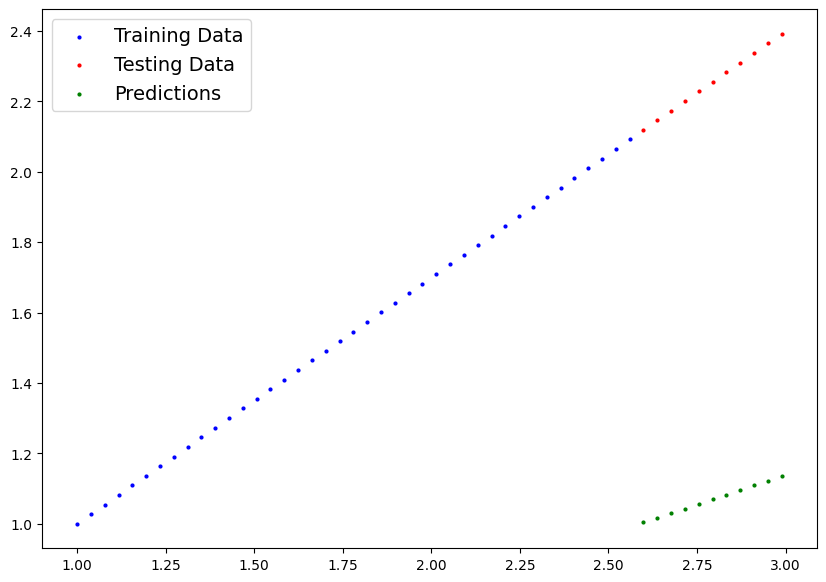

In [12]:
plot_predictions(predictions = y_pred)

# Train Model

### Optimizers and Loss Functions
Things we need to train:
* Loss function: A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* Optimizer: Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss
function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

Loss Example
* we can write our own `MAE_loss = torch.mean(torch.abs (y_pred-y_test))`
* or we can use build in function `MAE_loss = torch.nn.L1Loss`

Optimizer

Inside the optimizer you'll often have to set two parameters:
* params -> the model parameters you'd like to optimize, for example params=Model0.parameters()
* lr (learning rate) -> the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small lr results in small changes, a large lr results in large changes)

*L1 is not differentiable and L2 is more prone to outliers

**Note:** Hyperparameters are value that a ML Eng/Scientist Sets, and parameter is a value that the model sets itself

In [14]:
# Set up Loss function
loss_fn = nn.L1Loss()

#Set up optimizer
optimizer = torch.optim.SGD(params = Model0.parameters(), lr = 1e-2) #learning rate = possibly the most important hyperparameter you can set

L1Loss()

### Training and Testing Loop
A couple of things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's forward () functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss

**Note**: 1, 2 should be in same order and 5 should come after 4 (rest 3, 4, 5 can be in any order)

In [ ]:
# An epoch is one loop through the data.. (this is a hyperparameter)
epochs = 1

# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  Model0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients  #default mode of Model

  # 1. Forward pass
  y_pred = Model0(X_train)

  #2. calculate Loss
  loss = loss_fn(y_pred, Y_train) #standard input(pred) first then target

  #3. Optimizer zero grad
  optimizer.zero_grad()  # so that it doesn't store prev grad (of prev epoch) and we start fresh (stores for improved efficiency (mostly in Adam and ... or maybe in RNN))

  #4. Perform BackPropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Step the Optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop



  # Model0.eval() # turns off gradient tracking